In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error


set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses_df)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

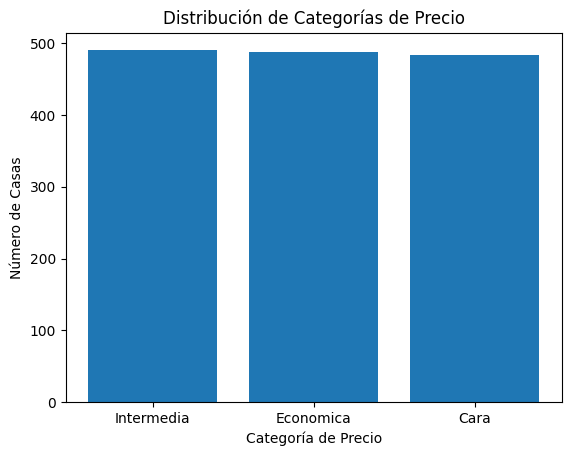

In [4]:
# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [5]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [6]:
preprocesador = ColumnTransformer([
    ('Variables Categóricas',preprocesador_categorico, categorical_columns),
    ('Variables Numéricas',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [7]:
modelo = make_pipeline(preprocesador,MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(30, 20),max_iter=500))
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [8]:
target = houses_df.pop('Precio_Categoria')
data = houses_df.drop(['Id', 'SalePrice'], axis=1)

In [9]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [10]:
modelo.fit(data_train,target_train)

Iteration 1, loss = 1.07592107
Iteration 2, loss = 0.91959851
Iteration 3, loss = 0.82617140
Iteration 4, loss = 0.75383625
Iteration 5, loss = 0.69294218
Iteration 6, loss = 0.63484581
Iteration 7, loss = 0.58097041
Iteration 8, loss = 0.53461889
Iteration 9, loss = 0.49513334
Iteration 10, loss = 0.45921181
Iteration 11, loss = 0.42825233
Iteration 12, loss = 0.40212846
Iteration 13, loss = 0.38398277
Iteration 14, loss = 0.36573000
Iteration 15, loss = 0.35006971
Iteration 16, loss = 0.33418153
Iteration 17, loss = 0.32371158
Iteration 18, loss = 0.31147181
Iteration 19, loss = 0.30150542
Iteration 20, loss = 0.29248074
Iteration 21, loss = 0.28145576
Iteration 22, loss = 0.27147835
Iteration 23, loss = 0.26209246
Iteration 24, loss = 0.25874452
Iteration 25, loss = 0.25179937
Iteration 26, loss = 0.24183317
Iteration 27, loss = 0.23408144
Iteration 28, loss = 0.22794328
Iteration 29, loss = 0.21994170
Iteration 30, loss = 0.21386674
Iteration 31, loss = 0.20750539
Iteration 32, los

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [11]:
pred = modelo.predict(data_test)

In [12]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[133   0  19]
 [  1 114  22]
 [ 16  24 109]]
Accuracy:  0.8127853881278538
Precision:  0.8127853881278538
recall:  0.8127853881278538


In [13]:
modelo1 = make_pipeline(preprocesador,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=(), max_iter=300))

modelo1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [14]:
modelo1.fit(data_train,target_train)

Iteration 1, loss = 1.44468612
Iteration 2, loss = 1.27568249
Iteration 3, loss = 1.15007751
Iteration 4, loss = 1.05946692
Iteration 5, loss = 0.98730446
Iteration 6, loss = 0.92558438
Iteration 7, loss = 0.87321855
Iteration 8, loss = 0.82871392
Iteration 9, loss = 0.79183320
Iteration 10, loss = 0.75903137
Iteration 11, loss = 0.73091701
Iteration 12, loss = 0.70629276
Iteration 13, loss = 0.68545090
Iteration 14, loss = 0.66612097
Iteration 15, loss = 0.64861899
Iteration 16, loss = 0.63340282
Iteration 17, loss = 0.61885134
Iteration 18, loss = 0.60600259
Iteration 19, loss = 0.59439808
Iteration 20, loss = 0.58339576
Iteration 21, loss = 0.57368033
Iteration 22, loss = 0.56395954
Iteration 23, loss = 0.55548142
Iteration 24, loss = 0.54775117
Iteration 25, loss = 0.54008023
Iteration 26, loss = 0.53213305
Iteration 27, loss = 0.52492515
Iteration 28, loss = 0.51837825
Iteration 29, loss = 0.51196482
Iteration 30, loss = 0.50609696
Iteration 31, loss = 0.50068349
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [15]:
pred1 = modelo1.predict(data_test)

In [16]:
cm = confusion_matrix(target_test,pred1)
accuracy=accuracy_score(target_test,pred1)
precision =precision_score(target_test,pred1,average='micro')
recall =  recall_score(target_test,pred1,average='micro')
f1 = f1_score(target_test,pred1,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[131   0  21]
 [  1 115  21]
 [ 24  25 100]]
Accuracy:  0.7899543378995434
Precision:  0.7899543378995434
recall:  0.7899543378995434


In [17]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,10),
    'mlpclassifier__hidden_layer_sizes':((30,20),(50,30),(10,20))}
model_grid_search = GridSearchCV(modelo1, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 0.86280695
Iteration 2, loss = 0.43514965
Iteration 3, loss = 0.38180355
Iteration 4, loss = 0.34165969
Iteration 5, loss = 0.30395871
Iteration 6, loss = 0.27907170
Iteration 1, loss = 1.03891020
Iteration 7, loss = 0.27524708
Iteration 2, loss = 0.46624539
Iteration 8, loss = 0.27770323
Iteration 3, loss = 0.43970928
Iteration 9, loss = 0.24364976
Iteration 4, loss = 0.36122107
Iteration 10, loss = 0.21527758
Iteration 5, loss = 0.32662617
Iteration 11, loss = 0.20426254
Iteration 6, loss = 0.28997952
Iteration 12, loss = 0.18431477
Iteration 7, loss = 0.27014314
Iteration 13, loss = 0.17060465
Iteration 8, loss = 0.24542109
Iteration 14, loss = 0.18039237
Iteration 9, loss = 0.22187332
Iteration 15, loss = 0.14694004
Iteration 10, loss = 0.20928104
Iteration 16, loss = 0.15045169
Iteration 11, loss = 0.19919773
Iteration 17, loss = 0.13892919
Iteration 12, loss = 0.18235603
Iteration 18, loss = 0.13022818
Iteration 13, loss = 0.18085481
Iteration 19, loss = 0.113

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.12568400
Iteration 51, loss = 0.18592621
Iteration 72, loss = 0.12748595
Iteration 52, loss = 0.18089368
Iteration 73, loss = 0.12444260
Iteration 53, loss = 0.17919851
Iteration 74, loss = 0.12410933
Iteration 54, loss = 0.17637136
Iteration 75, loss = 0.12137489
Iteration 55, loss = 0.17193842
Iteration 76, loss = 0.11803664
Iteration 56, loss = 0.17183975
Iteration 77, loss = 0.11839078
Iteration 57, loss = 0.17004452
Iteration 78, loss = 0.11669164
Iteration 58, loss = 0.16513977
Iteration 79, loss = 0.11464996
Iteration 59, loss = 0.16655519
Iteration 80, loss = 0.11199175
Iteration 60, loss = 0.16241138
Iteration 81, loss = 0.11253172
Iteration 61, loss = 0.15905397
Iteration 82, loss = 0.11238227
Iteration 62, loss = 0.15862205
Iteration 83, loss = 0.10801534
Iteration 63, loss = 0.15726465
Iteration 84, loss = 0.10723756
Iteration 64, loss = 0.15265484
Iteration 85, loss = 0.10550585
Iteration 65, loss = 0.15135813
Iteration 86, loss = 0.10508208
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.15204372
Iteration 29, loss = 0.22668728
Iteration 50, loss = 0.14915543
Iteration 30, loss = 0.22165561
Iteration 51, loss = 0.14793141
Iteration 31, loss = 0.21867770
Iteration 52, loss = 0.14358687
Iteration 32, loss = 0.21374482
Iteration 53, loss = 0.14471657
Iteration 33, loss = 0.20930250
Iteration 54, loss = 0.14031608
Iteration 34, loss = 0.20703529
Iteration 55, loss = 0.14128237
Iteration 35, loss = 0.20315772
Iteration 56, loss = 0.13611582
Iteration 36, loss = 0.20037327
Iteration 57, loss = 0.13172742
Iteration 37, loss = 0.19519165
Iteration 58, loss = 0.13405491
Iteration 38, loss = 0.19394413
Iteration 59, loss = 0.12756353
Iteration 39, loss = 0.18920008
Iteration 60, loss = 0.12896041
Iteration 40, loss = 0.18642344
Iteration 61, loss = 0.12284179
Iteration 41, loss = 0.18134065
Iteration 62, loss = 0.12180306
Iteration 42, loss = 0.17957553
Iteration 63, loss = 0.11882099
Iteration 43, loss = 0.17669461
Iteration 64, loss = 0.11757331
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.27826113
Iteration 7, loss = 0.50143902
Iteration 28, loss = 0.27266486
Iteration 8, loss = 0.47287938
Iteration 29, loss = 0.26654271
Iteration 9, loss = 0.45136183
Iteration 30, loss = 0.26226887
Iteration 10, loss = 0.43201452
Iteration 31, loss = 0.25625901
Iteration 11, loss = 0.41540094
Iteration 32, loss = 0.25302617
Iteration 12, loss = 0.40166402
Iteration 33, loss = 0.24668590
Iteration 13, loss = 0.38754154
Iteration 34, loss = 0.24399262
Iteration 14, loss = 0.37632239
Iteration 35, loss = 0.24181447
Iteration 15, loss = 0.36631315
Iteration 36, loss = 0.23464101
Iteration 16, loss = 0.35617146
Iteration 37, loss = 0.23077721
Iteration 17, loss = 0.34622348
Iteration 38, loss = 0.22750728
Iteration 18, loss = 0.33828131
Iteration 39, loss = 0.22061426
Iteration 19, loss = 0.33215400
Iteration 40, loss = 0.21880265
Iteration 20, loss = 0.32214336
Iteration 41, loss = 0.21578374
Iteration 21, loss = 0.31519628
Iteration 42, loss = 0.21041016
Iteration 2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.59664373
Iteration 97, loss = 0.09034375
Iteration 6, loss = 0.54290324
Iteration 98, loss = 0.09039817
Iteration 7, loss = 0.50451313
Iteration 99, loss = 0.08352519
Iteration 8, loss = 0.47275587
Iteration 100, loss = 0.07976185
Iteration 9, loss = 0.44901582
Iteration 10, loss = 0.42808234
Iteration 11, loss = 0.41188632
Iteration 12, loss = 0.39620153
Iteration 13, loss = 0.38249381
Iteration 14, loss = 0.37019950
Iteration 15, loss = 0.36003890
Iteration 16, loss = 0.35020262
Iteration 17, loss = 0.34496061
Iteration 18, loss = 0.33239390
Iteration 19, loss = 0.32552071
Iteration 20, loss = 0.31572863
Iteration 21, loss = 0.31004976
Iteration 1, loss = 1.21802032
Iteration 22, loss = 0.30214814
Iteration 2, loss = 0.90976817
Iteration 23, loss = 0.29672410
Iteration 3, loss = 0.75965896
Iteration 24, loss = 0.28890453
Iteration 4, loss = 0.65183629
Iteration 25, loss = 0.28348628
Iteration 5, loss = 0.58426508
Iteration 26, loss = 0.27874324
Iteration 6, loss

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 73, loss = 0.12285291
Iteration 55, loss = 0.16663633
Iteration 74, loss = 0.11989704
Iteration 56, loss = 0.16553625
Iteration 75, loss = 0.11956344
Iteration 57, loss = 0.16557250
Iteration 76, loss = 0.11703001
Iteration 58, loss = 0.15805814
Iteration 77, loss = 0.11534714
Iteration 59, loss = 0.16097094
Iteration 78, loss = 0.11412490
Iteration 60, loss = 0.15729559
Iteration 79, loss = 0.11454870
Iteration 61, loss = 0.15687020
Iteration 80, loss = 0.11348740
Iteration 62, loss = 0.15119798
Iteration 81, loss = 0.11234744
Iteration 63, loss = 0.15325396
Iteration 82, loss = 0.10932298
Iteration 64, loss = 0.14933469
Iteration 83, loss = 0.10831394
Iteration 65, loss = 0.14609880
Iteration 84, loss = 0.10736254
Iteration 66, loss = 0.14511922
Iteration 85, loss = 0.10604891
Iteration 67, loss = 0.14354271
Iteration 86, loss = 0.10644457
Iteration 68, loss = 0.14098000
Iteration 87, loss = 0.10457690
Iteration 69, loss = 0.14250547
Iteration 88, loss = 0.10173574
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.29780505
Iteration 42, loss = 0.21109336
Iteration 25, loss = 0.29137836
Iteration 43, loss = 0.20851483
Iteration 26, loss = 0.28833663
Iteration 44, loss = 0.20433249
Iteration 27, loss = 0.27976927
Iteration 45, loss = 0.20152465
Iteration 28, loss = 0.27670524
Iteration 46, loss = 0.19916025
Iteration 29, loss = 0.27060505
Iteration 47, loss = 0.19581507
Iteration 30, loss = 0.26636130
Iteration 48, loss = 0.19333178
Iteration 31, loss = 0.26012185
Iteration 49, loss = 0.19201636
Iteration 32, loss = 0.25494288
Iteration 50, loss = 0.18714068
Iteration 33, loss = 0.25074459
Iteration 51, loss = 0.18644327
Iteration 34, loss = 0.24650104
Iteration 52, loss = 0.18336702
Iteration 35, loss = 0.24211449
Iteration 53, loss = 0.18038096
Iteration 36, loss = 0.23835869
Iteration 54, loss = 0.17800692
Iteration 37, loss = 0.23487187
Iteration 55, loss = 0.17507456
Iteration 38, loss = 0.23041633
Iteration 56, loss = 0.17322888
Iteration 39, loss = 0.22696124
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.37072522
Iteration 12, loss = 0.35828942
Iteration 13, loss = 0.34550920
Iteration 14, loss = 0.33591316
Iteration 15, loss = 0.32569254
Iteration 16, loss = 0.31665568
Iteration 17, loss = 0.30887993
Iteration 18, loss = 0.29960653
Iteration 1, loss = 1.06445807
Iteration 19, loss = 0.29251094
Iteration 2, loss = 0.77123820
Iteration 20, loss = 0.28589458
Iteration 3, loss = 0.63553568
Iteration 21, loss = 0.27683065
Iteration 4, loss = 0.54825269
Iteration 22, loss = 0.27080557
Iteration 5, loss = 0.49664422
Iteration 23, loss = 0.26343136
Iteration 6, loss = 0.46013306
Iteration 24, loss = 0.25758348
Iteration 7, loss = 0.43342317
Iteration 25, loss = 0.25078288
Iteration 8, loss = 0.41391080
Iteration 26, loss = 0.24456530
Iteration 9, loss = 0.39565469
Iteration 27, loss = 0.23919974
Iteration 10, loss = 0.38159592
Iteration 28, loss = 0.23344578
Iteration 11, loss = 0.36671589
Iteration 29, loss = 0.22842473
Iteration 12, loss = 0.35534228
Iteration 30, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.13569980
Iteration 53, loss = 0.17634720
Iteration 54, loss = 0.17418276
Iteration 71, loss = 0.13023086
Iteration 55, loss = 0.17189440
Iteration 72, loss = 0.13043088
Iteration 56, loss = 0.16916944
Iteration 73, loss = 0.13025557
Iteration 57, loss = 0.16627980
Iteration 74, loss = 0.12696778
Iteration 58, loss = 0.16520593
Iteration 75, loss = 0.12629542
Iteration 59, loss = 0.16291507
Iteration 76, loss = 0.12393032
Iteration 60, loss = 0.15978607
Iteration 77, loss = 0.12347466
Iteration 61, loss = 0.15721721
Iteration 78, loss = 0.12218722
Iteration 62, loss = 0.15604188
Iteration 79, loss = 0.12015263
Iteration 63, loss = 0.15172609
Iteration 80, loss = 0.11867736
Iteration 64, loss = 0.14952748
Iteration 81, loss = 0.11801937
Iteration 65, loss = 0.14889144
Iteration 82, loss = 0.11846166
Iteration 66, loss = 0.14579987
Iteration 83, loss = 0.11800365
Iteration 67, loss = 0.14384779
Iteration 84, loss = 0.11740131
Iteration 68, loss = 0.14100727
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.31284012
Iteration 39, loss = 0.21417398
Iteration 22, loss = 0.30652322
Iteration 40, loss = 0.21027782
Iteration 23, loss = 0.30167454
Iteration 41, loss = 0.20680977
Iteration 24, loss = 0.29567976
Iteration 42, loss = 0.20276173
Iteration 25, loss = 0.29019035
Iteration 43, loss = 0.20138439
Iteration 26, loss = 0.28510003
Iteration 44, loss = 0.19603306
Iteration 27, loss = 0.28021746
Iteration 45, loss = 0.19317009
Iteration 28, loss = 0.27422470
Iteration 46, loss = 0.18919859
Iteration 29, loss = 0.27018915
Iteration 47, loss = 0.18718923
Iteration 30, loss = 0.26594194
Iteration 48, loss = 0.18359362
Iteration 31, loss = 0.26064377
Iteration 49, loss = 0.18285786
Iteration 32, loss = 0.25532297
Iteration 50, loss = 0.17887690
Iteration 33, loss = 0.25143506
Iteration 51, loss = 0.17631595
Iteration 34, loss = 0.24747041
Iteration 52, loss = 0.17423160
Iteration 35, loss = 0.24344676
Iteration 36, loss = 0.24014238
Iteration 53, loss = 0.17138398
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 196, loss = 0.03825081
Iteration 2, loss = 1.02445431
Iteration 197, loss = 0.03833119
Iteration 3, loss = 0.81396213
Iteration 198, loss = 0.03796153
Iteration 4, loss = 0.68272526
Iteration 199, loss = 0.03901086
Iteration 5, loss = 0.60746476
Iteration 200, loss = 0.03903106
Iteration 6, loss = 0.55295164
Iteration 7, loss = 0.51133712
Iteration 8, loss = 0.48194190
Iteration 9, loss = 0.45420646
Iteration 10, loss = 0.43501385
Iteration 11, loss = 0.41686719
Iteration 12, loss = 0.40311432
Iteration 13, loss = 0.38928250
Iteration 14, loss = 0.37753366
Iteration 15, loss = 0.36674100
Iteration 16, loss = 0.35770054
Iteration 17, loss = 0.34796528
Iteration 18, loss = 0.34053686
Iteration 1, loss = 1.14321749
Iteration 19, loss = 0.33197947
Iteration 2, loss = 0.80036988
Iteration 20, loss = 0.32529603
Iteration 3, loss = 0.65763191
Iteration 21, loss = 0.31765119
Iteration 4, loss = 0.57210103
Iteration 22, loss = 0.31090206
Iteration 5, loss = 0.51529184
Iteration 23, lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.13145081
Iteration 56, loss = 0.13158696
Iteration 57, loss = 0.12707665
Iteration 58, loss = 0.12555636
Iteration 59, loss = 0.12511777
Iteration 60, loss = 0.12377275
Iteration 1, loss = 1.11259898
Iteration 61, loss = 0.11977824
Iteration 62, loss = 0.11991317
Iteration 2, loss = 0.76936993
Iteration 3, loss = 0.60130797
Iteration 4, loss = 0.51674615
Iteration 5, loss = 0.47146290
Iteration 63, loss = 0.11975060
Iteration 64, loss = 0.12254637
Iteration 65, loss = 0.11625109
Iteration 6, loss = 0.43585916
Iteration 66, loss = 0.11188290
Iteration 7, loss = 0.41204585
Iteration 8, loss = 0.38792645
Iteration 67, loss = 0.10989381
Iteration 9, loss = 0.37195622
Iteration 68, loss = 0.10928493
Iteration 69, loss = 0.10558972
Iteration 10, loss = 0.35649412
Iteration 70, loss = 0.10424538
Iteration 11, loss = 0.34402223
Iteration 12, loss = 0.33272386
Iteration 71, loss = 0.10214772
Iteration 13, loss = 0.32282508
Iteration 72, loss = 0.10114560
Iteration 14, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.15863668
Iteration 47, loss = 0.15561099
Iteration 48, loss = 0.15429871
Iteration 49, loss = 0.15216699
Iteration 50, loss = 0.15512390
Iteration 51, loss = 0.15227112
Iteration 52, loss = 0.14757394
Iteration 53, loss = 0.14392366
Iteration 54, loss = 0.14518226
Iteration 55, loss = 0.14216669
Iteration 56, loss = 0.13753612
Iteration 57, loss = 0.13340329
Iteration 58, loss = 0.13306451
Iteration 59, loss = 0.13300063
Iteration 60, loss = 0.13168607
Iteration 61, loss = 0.12862600
Iteration 62, loss = 0.13096414
Iteration 63, loss = 0.12339017
Iteration 64, loss = 0.12291894
Iteration 65, loss = 0.12035185
Iteration 66, loss = 0.11899148
Iteration 67, loss = 0.11902440
Iteration 68, loss = 0.11642148
Iteration 1, loss = 1.08295903
Iteration 69, loss = 0.11616002
Iteration 70, loss = 0.11879811
Iteration 2, loss = 0.75705496
Iteration 71, loss = 0.11067900
Iteration 72, loss = 0.11172635
Iteration 3, loss = 0.60846850
Iteration 73, loss = 0.10922712
Iteration 4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.14100889
Iteration 55, loss = 0.13697958
Iteration 16, loss = 0.28671791
Iteration 56, loss = 0.13588140
Iteration 57, loss = 0.13345490
Iteration 58, loss = 0.13160385
Iteration 59, loss = 0.13057191
Iteration 60, loss = 0.12649894
Iteration 17, loss = 0.27856158
Iteration 61, loss = 0.12579504
Iteration 18, loss = 0.27010213
Iteration 62, loss = 0.12394387
Iteration 19, loss = 0.26207452
Iteration 63, loss = 0.12194651
Iteration 20, loss = 0.25597198
Iteration 64, loss = 0.11960032
Iteration 65, loss = 0.11763181
Iteration 66, loss = 0.11690993
Iteration 67, loss = 0.11412975
Iteration 21, loss = 0.24836608
Iteration 68, loss = 0.11293139
Iteration 22, loss = 0.24221137
Iteration 69, loss = 0.11389678
Iteration 70, loss = 0.11306601
Iteration 23, loss = 0.23648897
Iteration 71, loss = 0.10887008
Iteration 72, loss = 0.10720178
Iteration 73, loss = 0.10544027
Iteration 24, loss = 0.22777638
Iteration 74, loss = 0.10616184
Iteration 25, loss = 0.22391272
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.07424601
Iteration 18, loss = 0.29421573
Iteration 85, loss = 0.07225368
Iteration 19, loss = 0.28667473
Iteration 20, loss = 0.27915707
Iteration 86, loss = 0.07237032
Iteration 21, loss = 0.27380815
Iteration 87, loss = 0.06867236
Iteration 22, loss = 0.26647929
Iteration 88, loss = 0.07057026
Iteration 23, loss = 0.25928789
Iteration 89, loss = 0.06768443
Iteration 24, loss = 0.25436058
Iteration 25, loss = 0.24709074
Iteration 90, loss = 0.06518322
Iteration 91, loss = 0.06439350
Iteration 92, loss = 0.06568095
Iteration 26, loss = 0.24216643
Iteration 93, loss = 0.06417385
Iteration 27, loss = 0.23643876
Iteration 28, loss = 0.23211595
Iteration 94, loss = 0.06509552
Iteration 29, loss = 0.22520670
Iteration 30, loss = 0.21956798
Iteration 95, loss = 0.06267242
Iteration 96, loss = 0.06251837
Iteration 31, loss = 0.21528714
Iteration 32, loss = 0.21075269
Iteration 97, loss = 0.06066266
Iteration 33, loss = 0.20709378
Iteration 34, loss = 0.20365391
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.28368798
Iteration 62, loss = 0.12357944
Iteration 16, loss = 0.27630761
Iteration 17, loss = 0.26734607
Iteration 63, loss = 0.12397447
Iteration 64, loss = 0.11889975
Iteration 18, loss = 0.25923147
Iteration 65, loss = 0.11767484
Iteration 66, loss = 0.11551418
Iteration 19, loss = 0.25430445
Iteration 20, loss = 0.24889077
Iteration 67, loss = 0.11369346
Iteration 21, loss = 0.24147106
Iteration 68, loss = 0.11108127
Iteration 22, loss = 0.23511016
Iteration 69, loss = 0.11039484
Iteration 70, loss = 0.10907818
Iteration 23, loss = 0.22909852
Iteration 71, loss = 0.10857508
Iteration 24, loss = 0.22315890
Iteration 25, loss = 0.21892801
Iteration 26, loss = 0.21399869
Iteration 72, loss = 0.10462739
Iteration 73, loss = 0.10522203
Iteration 74, loss = 0.10736818
Iteration 27, loss = 0.20942326
Iteration 28, loss = 0.20582609
Iteration 29, loss = 0.19987651
Iteration 30, loss = 0.20004670
Iteration 75, loss = 0.10355182
Iteration 76, loss = 0.10516874
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.12189455
Iteration 58, loss = 0.11884948
Iteration 59, loss = 0.11715443
Iteration 1, loss = 0.99397754
Iteration 60, loss = 0.11283321
Iteration 2, loss = 0.70657626
Iteration 61, loss = 0.11530417
Iteration 3, loss = 0.57842208
Iteration 4, loss = 0.50399013
Iteration 62, loss = 0.11674014
Iteration 63, loss = 0.11322977
Iteration 5, loss = 0.46104380
Iteration 64, loss = 0.11232029
Iteration 6, loss = 0.43031935
Iteration 65, loss = 0.10550111
Iteration 7, loss = 0.40048578
Iteration 66, loss = 0.11200600
Iteration 8, loss = 0.38346213
Iteration 67, loss = 0.10666204
Iteration 9, loss = 0.36721214
Iteration 68, loss = 0.10357279
Iteration 10, loss = 0.35243987
Iteration 69, loss = 0.10341110
Iteration 11, loss = 0.33949527
Iteration 70, loss = 0.09918597
Iteration 12, loss = 0.32931599
Iteration 71, loss = 0.09584792
Iteration 13, loss = 0.31828498
Iteration 72, loss = 0.09851957
Iteration 14, loss = 0.30958468
Iteration 73, loss = 0.09407658
Iteration 15, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.31030369
Iteration 69, loss = 0.10117482
Iteration 17, loss = 0.29963004
Iteration 18, loss = 0.29479095
Iteration 19, loss = 0.28629333
Iteration 70, loss = 0.09341153
Iteration 20, loss = 0.27882277
Iteration 71, loss = 0.09553918
Iteration 21, loss = 0.27115234
Iteration 72, loss = 0.08984069
Iteration 22, loss = 0.26507027
Iteration 23, loss = 0.25832199
Iteration 24, loss = 0.25346411
Iteration 73, loss = 0.09010906
Iteration 25, loss = 0.24970473
Iteration 74, loss = 0.09884307
Iteration 75, loss = 0.09180449
Iteration 76, loss = 0.08736444
Iteration 26, loss = 0.23955775
Iteration 27, loss = 0.23694995
Iteration 77, loss = 0.08384596
Iteration 28, loss = 0.23795999
Iteration 29, loss = 0.22418416
Iteration 78, loss = 0.08171867
Iteration 30, loss = 0.22093210
Iteration 79, loss = 0.08200873
Iteration 31, loss = 0.21670712
Iteration 80, loss = 0.08102430
Iteration 32, loss = 0.21226957
Iteration 81, loss = 0.08252937
Iteration 33, loss = 0.20618612
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.12198648
Iteration 67, loss = 0.12284434
Iteration 68, loss = 0.11947715
Iteration 69, loss = 0.11782707
Iteration 70, loss = 0.11572330
Iteration 71, loss = 0.11389518
Iteration 72, loss = 0.11305182
Iteration 73, loss = 0.11077721
Iteration 74, loss = 0.10856985
Iteration 75, loss = 0.10727130
Iteration 76, loss = 0.10645909
Iteration 77, loss = 0.10668113
Iteration 1, loss = 1.09400205
Iteration 78, loss = 0.10586287
Iteration 2, loss = 0.82329375
Iteration 3, loss = 0.61127400
Iteration 4, loss = 0.55547614
Iteration 79, loss = 0.10206983
Iteration 80, loss = 0.10327965
Iteration 81, loss = 0.10021519
Iteration 5, loss = 0.48509946
Iteration 82, loss = 0.10243366
Iteration 6, loss = 0.45237936
Iteration 7, loss = 0.42579968
Iteration 83, loss = 0.10214998
Iteration 8, loss = 0.40331122
Iteration 84, loss = 0.09831443
Iteration 85, loss = 0.09645097
Iteration 9, loss = 0.38898416
Iteration 86, loss = 0.09737466
Iteration 10, loss = 0.37495447
Iteration 11, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.21832922
Iteration 33, loss = 0.21482536
Iteration 34, loss = 0.20850284
Iteration 35, loss = 0.20554846
Iteration 1, loss = 1.12722330
Iteration 2, loss = 0.79089748
Iteration 3, loss = 0.63006421
Iteration 36, loss = 0.19961689
Iteration 4, loss = 0.55102154
Iteration 5, loss = 0.49458375
Iteration 6, loss = 0.45165204
Iteration 7, loss = 0.42513921
Iteration 8, loss = 0.39981572
Iteration 37, loss = 0.19601116
Iteration 9, loss = 0.38256781
Iteration 38, loss = 0.19284988
Iteration 10, loss = 0.36695482
Iteration 39, loss = 0.18937555
Iteration 11, loss = 0.35328321
Iteration 40, loss = 0.18521499
Iteration 41, loss = 0.18123390
Iteration 42, loss = 0.17856472Iteration 12, loss = 0.34185759

Iteration 13, loss = 0.33103573
Iteration 14, loss = 0.32132790
Iteration 43, loss = 0.17725268
Iteration 15, loss = 0.31235477
Iteration 16, loss = 0.30503415
Iteration 44, loss = 0.17211599
Iteration 45, loss = 0.16764066
Iteration 17, loss = 0.29604795
Iteration 46, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 148, loss = 0.04520831
Iteration 34, loss = 0.18254754
Iteration 35, loss = 0.17998422
Iteration 36, loss = 0.17661749
Iteration 149, loss = 0.04324618
Iteration 37, loss = 0.17429163
Iteration 150, loss = 0.04221995
Iteration 38, loss = 0.16985372
Iteration 151, loss = 0.04326967
Iteration 152, loss = 0.04426437
Iteration 39, loss = 0.16861694
Iteration 40, loss = 0.16557647
Iteration 41, loss = 0.16074615
Iteration 153, loss = 0.04221159
Iteration 42, loss = 0.15915824
Iteration 154, loss = 0.04154325
Iteration 43, loss = 0.15637266
Iteration 155, loss = 0.04204417
Iteration 44, loss = 0.15273943
Iteration 156, loss = 0.04302237
Iteration 45, loss = 0.15060721
Iteration 46, loss = 0.14797255
Iteration 157, loss = 0.04304230
Iteration 47, loss = 0.15010702
Iteration 48, loss = 0.14307914
Iteration 158, loss = 0.04381829
Iteration 49, loss = 0.14162590
Iteration 159, loss = 0.04524411
Iteration 50, loss = 0.13804586
Iteration 160, loss = 0.04317871
Iteration 51, loss = 0.1389

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 121, loss = 0.05030572
Iteration 15, loss = 0.30006272
Iteration 122, loss = 0.05088660
Iteration 123, loss = 0.04917901
Iteration 16, loss = 0.29114461
Iteration 124, loss = 0.05193559
Iteration 17, loss = 0.28421510
Iteration 125, loss = 0.04981151
Iteration 126, loss = 0.04820699
Iteration 18, loss = 0.27902544
Iteration 19, loss = 0.26875123
Iteration 127, loss = 0.05044434
Iteration 20, loss = 0.26385849
Iteration 21, loss = 0.25575908
Iteration 128, loss = 0.04992995
Iteration 22, loss = 0.25183300
Iteration 23, loss = 0.24508064
Iteration 129, loss = 0.04871433
Iteration 130, loss = 0.04584910
Iteration 24, loss = 0.23900723
Iteration 131, loss = 0.04757560
Iteration 132, loss = 0.04450679
Iteration 25, loss = 0.23275606
Iteration 133, loss = 0.04452802
Iteration 134, loss = 0.04529744
Iteration 26, loss = 0.22840189
Iteration 135, loss = 0.04300294
Iteration 27, loss = 0.22130081
Iteration 136, loss = 0.04227823
Iteration 28, loss = 0.21853598
Iteration 137, loss = 0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.29323713
Iteration 19, loss = 0.28266585
Iteration 119, loss = 0.06568032
Iteration 20, loss = 0.27957040
Iteration 21, loss = 0.26911709
Iteration 120, loss = 0.06619794
Iteration 121, loss = 0.06415995
Iteration 22, loss = 0.26399580
Iteration 122, loss = 0.06347231
Iteration 123, loss = 0.06172318
Iteration 23, loss = 0.25403249
Iteration 124, loss = 0.06064457
Iteration 125, loss = 0.06132955
Iteration 24, loss = 0.25038098
Iteration 25, loss = 0.24565451
Iteration 26, loss = 0.23928668
Iteration 126, loss = 0.06097557
Iteration 27, loss = 0.23161369
Iteration 127, loss = 0.05993952
Iteration 128, loss = 0.06128572
Iteration 28, loss = 0.23259788
Iteration 129, loss = 0.06192147
Iteration 29, loss = 0.22758410
Iteration 30, loss = 0.22230777
Iteration 130, loss = 0.06090503
Iteration 131, loss = 0.06144946
Iteration 132, loss = 0.05833746
Iteration 31, loss = 0.21310167
Iteration 133, loss = 0.05596693
Iteration 134, loss = 0.05647739
Iteration 135, loss = 0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 104, loss = 0.07536659
Iteration 105, loss = 0.07436878
Iteration 106, loss = 0.07409899
Iteration 107, loss = 0.07217502
Iteration 108, loss = 0.07041367
Iteration 109, loss = 0.06866054
Iteration 110, loss = 0.07111985
Iteration 111, loss = 0.06739564
Iteration 112, loss = 0.07093777
Iteration 1, loss = 1.38387923
Iteration 113, loss = 0.06690936
Iteration 2, loss = 0.83097197
Iteration 114, loss = 0.06706079
Iteration 3, loss = 0.63137835
Iteration 4, loss = 0.51428621
Iteration 5, loss = 0.46656574
Iteration 6, loss = 0.42414445
Iteration 115, loss = 0.06905238
Iteration 116, loss = 0.06836427
Iteration 117, loss = 0.07112751
Iteration 7, loss = 0.39417468
Iteration 8, loss = 0.37415685
Iteration 118, loss = 0.07603091
Iteration 9, loss = 0.35402240
Iteration 119, loss = 0.07061058
Iteration 10, loss = 0.33963694
Iteration 120, loss = 0.06617820
Iteration 11, loss = 0.32724701
Iteration 12, loss = 0.31582860
Iteration 13, loss = 0.30618942
Iteration 14, loss = 0.29694632


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 113, loss = 0.04877436
Iteration 114, loss = 0.04760155
Iteration 115, loss = 0.04683003
Iteration 116, loss = 0.04724735
Iteration 117, loss = 0.04635445
Iteration 1, loss = 0.93602802
Iteration 118, loss = 0.04699133
Iteration 2, loss = 0.71551827
Iteration 119, loss = 0.04519216
Iteration 120, loss = 0.04409102
Iteration 3, loss = 0.59220883
Iteration 121, loss = 0.04458712
Iteration 4, loss = 0.52350728
Iteration 122, loss = 0.04434212
Iteration 5, loss = 0.47493279
Iteration 123, loss = 0.04298773
Iteration 6, loss = 0.44302676
Iteration 124, loss = 0.04204107
Iteration 7, loss = 0.41616870
Iteration 125, loss = 0.04307312
Iteration 8, loss = 0.39823079
Iteration 126, loss = 0.04317279
Iteration 9, loss = 0.38115399
Iteration 127, loss = 0.04305752
Iteration 128, loss = 0.04155984
Iteration 129, loss = 0.04014942
Iteration 130, loss = 0.03982738
Iteration 10, loss = 0.36639488
Iteration 131, loss = 0.04108726
Iteration 11, loss = 0.35354763
Iteration 132, loss = 0.039583

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 91, loss = 0.08280582
Iteration 12, loss = 0.31806344
Iteration 92, loss = 0.07949893
Iteration 13, loss = 0.30777266
Iteration 93, loss = 0.07821928
Iteration 94, loss = 0.07463994
Iteration 14, loss = 0.29772976
Iteration 95, loss = 0.07267500
Iteration 15, loss = 0.28731259
Iteration 96, loss = 0.08432824
Iteration 16, loss = 0.27974219
Iteration 97, loss = 0.08169617
Iteration 17, loss = 0.26996548
Iteration 98, loss = 0.07747121
Iteration 18, loss = 0.26328178
Iteration 99, loss = 0.07202961
Iteration 19, loss = 0.25525572
Iteration 100, loss = 0.07390008
Iteration 20, loss = 0.24947831
Iteration 101, loss = 0.06875930
Iteration 102, loss = 0.06840767
Iteration 21, loss = 0.24304762
Iteration 22, loss = 0.23653669
Iteration 23, loss = 0.23240853
Iteration 103, loss = 0.06706297
Iteration 24, loss = 0.22607310
Iteration 25, loss = 0.22088631
Iteration 104, loss = 0.07006478
Iteration 26, loss = 0.21801898
Iteration 105, loss = 0.06662242
Iteration 27, loss = 0.21140092
It

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.25717668
Iteration 117, loss = 0.07850997
Iteration 23, loss = 0.25121698
Iteration 24, loss = 0.24553306
Iteration 118, loss = 0.08655986
Iteration 25, loss = 0.23946887
Iteration 119, loss = 0.07509938
Iteration 26, loss = 0.23301492
Iteration 120, loss = 0.06871382
Iteration 27, loss = 0.22849046
Iteration 121, loss = 0.06950374
Iteration 28, loss = 0.22429531
Iteration 122, loss = 0.06698761
Iteration 29, loss = 0.21944454
Iteration 123, loss = 0.06793305
Iteration 30, loss = 0.21561938
Iteration 124, loss = 0.06407093
Iteration 31, loss = 0.21035953
Iteration 125, loss = 0.06389571
Iteration 32, loss = 0.20398736
Iteration 33, loss = 0.20215448
Iteration 34, loss = 0.20068701
Iteration 126, loss = 0.06658345
Iteration 127, loss = 0.07516970
Iteration 128, loss = 0.07589114
Iteration 35, loss = 0.19219027
Iteration 129, loss = 0.08102172
Iteration 36, loss = 0.18871810
Iteration 37, loss = 0.18499355
Iteration 38, loss = 0.18593132
Iteration 130, loss = 0.071

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 155, loss = 0.03893867
Iteration 34, loss = 0.19108671
Iteration 156, loss = 0.03831919
Iteration 157, loss = 0.03990350
Iteration 35, loss = 0.18791312
Iteration 158, loss = 0.03675742
Iteration 36, loss = 0.18179918
Iteration 159, loss = 0.03599247
Iteration 37, loss = 0.18103905
Iteration 38, loss = 0.17717314
Iteration 39, loss = 0.17546293
Iteration 160, loss = 0.03535039
Iteration 161, loss = 0.03501559
Iteration 40, loss = 0.16847029
Iteration 41, loss = 0.16590334
Iteration 162, loss = 0.03553140
Iteration 42, loss = 0.16179691
Iteration 163, loss = 0.03540265
Iteration 164, loss = 0.03451955
Iteration 43, loss = 0.15874799
Iteration 165, loss = 0.03364474
Iteration 44, loss = 0.15515188
Iteration 166, loss = 0.03534504
Iteration 45, loss = 0.15195275
Iteration 167, loss = 0.03405153
Iteration 46, loss = 0.15213166
Iteration 47, loss = 0.14906999
Iteration 168, loss = 0.03367324
Iteration 48, loss = 0.14618910
Iteration 169, loss = 0.03388031
Iteration 49, loss = 0.14

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 119, loss = 0.05540546
Iteration 25, loss = 0.22772321
Iteration 120, loss = 0.05494572
Iteration 121, loss = 0.05385075
Iteration 122, loss = 0.05255836
Iteration 26, loss = 0.22160664
Iteration 123, loss = 0.05215935
Iteration 27, loss = 0.21865144
Iteration 28, loss = 0.21008826
Iteration 124, loss = 0.05227362
Iteration 29, loss = 0.20695679
Iteration 30, loss = 0.20273960
Iteration 31, loss = 0.19621107
Iteration 125, loss = 0.05248520
Iteration 32, loss = 0.19292802
Iteration 126, loss = 0.05338326
Iteration 127, loss = 0.05207495
Iteration 33, loss = 0.18936859
Iteration 128, loss = 0.04955538
Iteration 34, loss = 0.18614718
Iteration 129, loss = 0.04863301
Iteration 35, loss = 0.18286753
Iteration 36, loss = 0.17893548
Iteration 130, loss = 0.04827011
Iteration 131, loss = 0.05127669
Iteration 37, loss = 0.17498188
Iteration 132, loss = 0.05019192
Iteration 133, loss = 0.05474006
Iteration 38, loss = 0.17238790
Iteration 39, loss = 0.16835355
Iteration 40, loss = 0.16

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.11909052
Iteration 31, loss = 0.12546428
Iteration 32, loss = 0.11571303
Iteration 33, loss = 0.10771876
Iteration 34, loss = 0.12658477
Iteration 1, loss = 0.92815273
Iteration 35, loss = 0.13160482
Iteration 2, loss = 0.49470122
Iteration 36, loss = 0.10566373
Iteration 3, loss = 0.40357639
Iteration 37, loss = 0.09825284
Iteration 4, loss = 0.36487335
Iteration 38, loss = 0.11454116
Iteration 5, loss = 0.32881792
Iteration 39, loss = 0.09490969
Iteration 6, loss = 0.29998567
Iteration 40, loss = 0.08154326
Iteration 7, loss = 0.27046854
Iteration 41, loss = 0.08267355
Iteration 8, loss = 0.25974819
Iteration 42, loss = 0.08065322
Iteration 9, loss = 0.24021428
Iteration 43, loss = 0.08304087
Iteration 10, loss = 0.21827685
Iteration 44, loss = 0.10686007
Iteration 11, loss = 0.20607095
Iteration 45, loss = 0.11892581
Iteration 12, loss = 0.19917156
Iteration 46, loss = 0.07479691
Iteration 13, loss = 0.19363528
Iteration 47, loss = 0.08410725
Iteration 14, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.25774901
Iteration 46, loss = 0.25519046
Iteration 47, loss = 0.25126472
Iteration 48, loss = 0.24855773
Iteration 49, loss = 0.24682221
Iteration 50, loss = 0.24298702
Iteration 51, loss = 0.24148995
Iteration 52, loss = 0.23745966
Iteration 53, loss = 0.23565064
Iteration 54, loss = 0.23285291
Iteration 1, loss = 1.50756600
Iteration 55, loss = 0.22995857
Iteration 2, loss = 1.20845991
Iteration 56, loss = 0.22702136
Iteration 3, loss = 1.02022866
Iteration 57, loss = 0.22441584
Iteration 4, loss = 0.87761896
Iteration 58, loss = 0.22256713
Iteration 5, loss = 0.77096095
Iteration 59, loss = 0.22000621
Iteration 6, loss = 0.69032621
Iteration 60, loss = 0.21787628
Iteration 7, loss = 0.63454699
Iteration 61, loss = 0.21595744
Iteration 8, loss = 0.59048771
Iteration 62, loss = 0.21364267
Iteration 9, loss = 0.55384982
Iteration 63, loss = 0.21190443
Iteration 10, loss = 0.52603129
Iteration 64, loss = 0.20885569
Iteration 11, loss = 0.50222774
Iteration 65, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.19649701
Iteration 5, loss = 0.75202167
Iteration 59, loss = 0.19255805
Iteration 6, loss = 0.68807608
Iteration 60, loss = 0.19094162
Iteration 7, loss = 0.63554730
Iteration 61, loss = 0.18708267
Iteration 8, loss = 0.59176862
Iteration 62, loss = 0.18351167
Iteration 9, loss = 0.55640409
Iteration 63, loss = 0.18082771
Iteration 10, loss = 0.52543228
Iteration 64, loss = 0.17807841
Iteration 11, loss = 0.50101491
Iteration 65, loss = 0.17585579
Iteration 12, loss = 0.47910804
Iteration 66, loss = 0.17299662
Iteration 13, loss = 0.46002042
Iteration 67, loss = 0.17046129
Iteration 14, loss = 0.44350027
Iteration 68, loss = 0.16806661
Iteration 15, loss = 0.42859103
Iteration 69, loss = 0.16516258
Iteration 16, loss = 0.41580670
Iteration 70, loss = 0.16365588
Iteration 17, loss = 0.40391391
Iteration 71, loss = 0.16160944
Iteration 18, loss = 0.39254411
Iteration 72, loss = 0.15833157
Iteration 19, loss = 0.38259963
Iteration 73, loss = 0.15855021
Iteration 20,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.33631868
Iteration 84, loss = 0.16195393
Iteration 29, loss = 0.33001135
Iteration 85, loss = 0.16105766
Iteration 30, loss = 0.32430842
Iteration 86, loss = 0.16054253
Iteration 31, loss = 0.31913762
Iteration 87, loss = 0.15814046
Iteration 32, loss = 0.31421446
Iteration 88, loss = 0.15596129
Iteration 33, loss = 0.30891219
Iteration 89, loss = 0.15351582
Iteration 34, loss = 0.30409971
Iteration 90, loss = 0.15283376
Iteration 35, loss = 0.29941703
Iteration 91, loss = 0.15151790
Iteration 36, loss = 0.29504169
Iteration 92, loss = 0.15088386
Iteration 37, loss = 0.28986438
Iteration 93, loss = 0.14820094
Iteration 38, loss = 0.28621739
Iteration 94, loss = 0.14837542
Iteration 39, loss = 0.28178542
Iteration 95, loss = 0.14592561
Iteration 40, loss = 0.27673246
Iteration 96, loss = 0.14447627
Iteration 41, loss = 0.27377093
Iteration 97, loss = 0.14310346
Iteration 42, loss = 0.26854149
Iteration 98, loss = 0.14250761
Iteration 43, loss = 0.26619894
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.28849646
Iteration 96, loss = 0.14010742
Iteration 41, loss = 0.28341527
Iteration 97, loss = 0.14030649
Iteration 42, loss = 0.28078357
Iteration 98, loss = 0.13752118
Iteration 99, loss = 0.13606654
Iteration 43, loss = 0.27638564
Iteration 100, loss = 0.13528740
Iteration 44, loss = 0.27235972
Iteration 101, loss = 0.13389366
Iteration 45, loss = 0.26843792
Iteration 46, loss = 0.26465675
Iteration 102, loss = 0.13379951
Iteration 47, loss = 0.26043647
Iteration 103, loss = 0.13264680
Iteration 48, loss = 0.25649686
Iteration 104, loss = 0.13040212
Iteration 49, loss = 0.25322144
Iteration 105, loss = 0.13101854
Iteration 106, loss = 0.13071022
Iteration 50, loss = 0.24955459
Iteration 51, loss = 0.24648056
Iteration 107, loss = 0.12586179
Iteration 52, loss = 0.24423737
Iteration 108, loss = 0.12805188
Iteration 109, loss = 0.12677173
Iteration 53, loss = 0.23955905
Iteration 110, loss = 0.12368841
Iteration 54, loss = 0.23756734
Iteration 55, loss = 0.234446

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 169, loss = 0.08495958
Iteration 9, loss = 0.62315802
Iteration 170, loss = 0.08588776
Iteration 10, loss = 0.58257621
Iteration 171, loss = 0.08398641
Iteration 11, loss = 0.54684714
Iteration 172, loss = 0.08387283
Iteration 12, loss = 0.51608540
Iteration 173, loss = 0.08296106
Iteration 13, loss = 0.48957628
Iteration 174, loss = 0.08401543
Iteration 14, loss = 0.46658254
Iteration 175, loss = 0.08203569
Iteration 15, loss = 0.44750218
Iteration 176, loss = 0.08123963
Iteration 16, loss = 0.43032610
Iteration 177, loss = 0.08011533
Iteration 17, loss = 0.41575236
Iteration 178, loss = 0.08031417
Iteration 18, loss = 0.40266963
Iteration 179, loss = 0.07888808
Iteration 19, loss = 0.39059895
Iteration 180, loss = 0.07971319
Iteration 20, loss = 0.38046925
Iteration 181, loss = 0.07807589
Iteration 21, loss = 0.37076357
Iteration 182, loss = 0.07728318
Iteration 22, loss = 0.36187204
Iteration 183, loss = 0.07854201
Iteration 23, loss = 0.35432230
Iteration 184, loss = 0.07

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.21899572
Iteration 54, loss = 0.21683722
Iteration 55, loss = 0.21363216
Iteration 56, loss = 0.21013383
Iteration 57, loss = 0.20652768
Iteration 58, loss = 0.20578877
Iteration 59, loss = 0.20101232
Iteration 60, loss = 0.19948884
Iteration 61, loss = 0.19555905
Iteration 1, loss = 1.19912521
Iteration 62, loss = 0.19298481
Iteration 2, loss = 1.02948470
Iteration 63, loss = 0.18988009
Iteration 3, loss = 0.91484510
Iteration 64, loss = 0.18806278
Iteration 4, loss = 0.81766846
Iteration 65, loss = 0.18518682
Iteration 5, loss = 0.74151592
Iteration 66, loss = 0.18374554
Iteration 6, loss = 0.68006228
Iteration 67, loss = 0.18090747
Iteration 7, loss = 0.62949985
Iteration 8, loss = 0.58810661
Iteration 68, loss = 0.17877356
Iteration 69, loss = 0.17513794
Iteration 9, loss = 0.55597874
Iteration 70, loss = 0.17415188
Iteration 10, loss = 0.52762618
Iteration 71, loss = 0.17142007
Iteration 11, loss = 0.50426919
Iteration 72, loss = 0.16863808
Iteration 12, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.30650021
Iteration 94, loss = 0.14276988
Iteration 31, loss = 0.30223554
Iteration 95, loss = 0.14366446
Iteration 32, loss = 0.29642631
Iteration 96, loss = 0.14028023
Iteration 33, loss = 0.29210288
Iteration 97, loss = 0.13959599
Iteration 34, loss = 0.28732474
Iteration 98, loss = 0.13808600
Iteration 35, loss = 0.28269061
Iteration 99, loss = 0.13619264
Iteration 36, loss = 0.27841613
Iteration 100, loss = 0.13518900
Iteration 37, loss = 0.27472410
Iteration 101, loss = 0.13374526
Iteration 38, loss = 0.27037339
Iteration 102, loss = 0.13339682
Iteration 39, loss = 0.26640611
Iteration 103, loss = 0.13137328
Iteration 40, loss = 0.26250639
Iteration 104, loss = 0.13055753
Iteration 41, loss = 0.25845228
Iteration 105, loss = 0.12864442
Iteration 42, loss = 0.25430682
Iteration 106, loss = 0.12725204
Iteration 43, loss = 0.25101513
Iteration 107, loss = 0.12707022
Iteration 44, loss = 0.24726736
Iteration 108, loss = 0.12550902
Iteration 45, loss = 0.24324669

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.66802594
Iteration 160, loss = 0.06542209
Iteration 6, loss = 0.61324661
Iteration 161, loss = 0.06468593
Iteration 7, loss = 0.56998035
Iteration 162, loss = 0.06348095
Iteration 8, loss = 0.53730610
Iteration 163, loss = 0.06394668
Iteration 9, loss = 0.51076024
Iteration 164, loss = 0.06499324
Iteration 10, loss = 0.48751295
Iteration 165, loss = 0.06558188
Iteration 11, loss = 0.46829681
Iteration 166, loss = 0.06328699
Iteration 12, loss = 0.45217108
Iteration 167, loss = 0.06197381
Iteration 13, loss = 0.43803519
Iteration 168, loss = 0.06031782
Iteration 14, loss = 0.42487247
Iteration 169, loss = 0.06012963
Iteration 15, loss = 0.41313494
Iteration 170, loss = 0.05842420
Iteration 16, loss = 0.40417140
Iteration 171, loss = 0.05895738
Iteration 17, loss = 0.39387042
Iteration 172, loss = 0.05863607
Iteration 18, loss = 0.38536892
Iteration 173, loss = 0.05693662
Iteration 19, loss = 0.37678202
Iteration 174, loss = 0.05606866
Iteration 20, loss = 0.3685877

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.26161837
Iteration 49, loss = 0.25958673
Iteration 50, loss = 0.25659373
Iteration 51, loss = 0.25255776
Iteration 52, loss = 0.25045955
Iteration 53, loss = 0.24799088
Iteration 54, loss = 0.24477720
Iteration 55, loss = 0.24210650
Iteration 56, loss = 0.23833231
Iteration 57, loss = 0.23716603
Iteration 58, loss = 0.23349312
Iteration 59, loss = 0.23085936
Iteration 60, loss = 0.22794097
Iteration 61, loss = 0.22508439
Iteration 62, loss = 0.22288459
Iteration 63, loss = 0.22068677
Iteration 64, loss = 0.21779494
Iteration 1, loss = 1.12034401
Iteration 65, loss = 0.21662157
Iteration 2, loss = 0.93650887
Iteration 66, loss = 0.21292795
Iteration 3, loss = 0.82811318
Iteration 67, loss = 0.21104494
Iteration 4, loss = 0.74276367
Iteration 68, loss = 0.20985812
Iteration 5, loss = 0.67551809
Iteration 69, loss = 0.20608320
Iteration 6, loss = 0.61997179
Iteration 70, loss = 0.20413829
Iteration 7, loss = 0.57769048
Iteration 71, loss = 0.20298848
Iteration 8, lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Variables '
                                                                         'Categóricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofSty...
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='identity',
                                                      hidden_layer_sizes=(),
                                                      max_iter=300,
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((30, 20),
                                                               (50, 30),
                                                               (10, 20)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [18]:
model_grid_search.best_params_

{'mlpclassifier__hidden_layer_sizes': (10, 20),
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__max_iter': 100}

In [19]:
pred = model_grid_search.predict(data_test)

In [20]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[125   0  27]
 [  0 114  23]
 [ 18  20 111]]
Accuracy:  0.7990867579908676
Precision:  0.7990867579908676
recall:  0.7990867579908676


## Obteniendo la variable respuesta SalePrice

In [21]:
houses_df = pd.read_csv('train.csv')
y = houses_df.pop("SalePrice")
X = houses_df
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [22]:
preprocesador_categorico = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore")), ("imputer", SimpleImputer(strategy="median"))]
)
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [23]:
preprocesador = ColumnTransformer([
    ('Variables Categóricas',preprocesador_categorico, categorical_columns),
    ('Variables Numéricas',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [24]:
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [25]:
y_train

888     268000
939     244400
285     164700
927     176000
565     128000
         ...  
1116    184100
165     127500
1279     68400
1217    229456
729     103000
Name: SalePrice, Length: 1021, dtype: int64

In [26]:
model = make_pipeline(preprocesador, MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=350, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10))

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

In [27]:
# Ajustar el modelo
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

In [28]:
pred1 = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, pred1)
print("MSE (test):", mse)
mae_test = mean_absolute_error(y_test, pred1)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse)
print("RMSE (test):", rmse_test)

MSE (test): 1289490692.2606401
MAE (test): 23742.27102880617
RMSE (test): 35909.47914215187


In [30]:
modelBetter = make_pipeline(preprocesador, MLPRegressor(hidden_layer_sizes=(150, 70), activation='relu', solver='adam', alpha=0.000001, batch_size='auto', learning_rate='constant', learning_rate_init=0.01, max_iter=350, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.5, beta_2=0.999, epsilon=1e-12, n_iter_no_change=20))

In [31]:
modelBetter.fit(X_train, y_train)

Iteration 1, loss = 19600451544.78639984
Iteration 2, loss = 18517273899.59008789
Iteration 3, loss = 13850616208.85337830
Iteration 4, loss = 7899354928.69705105
Iteration 5, loss = 6850795261.13539982
Iteration 6, loss = 6747533820.44307137
Iteration 7, loss = 6621108281.39086533
Iteration 8, loss = 6497209088.95252895
Iteration 9, loss = 6384091152.68044949
Iteration 10, loss = 6235164006.55463982
Iteration 11, loss = 6070945466.80849552
Iteration 12, loss = 5862603516.00449657
Iteration 13, loss = 5640253866.83744526
Iteration 14, loss = 5395098303.41687775
Iteration 15, loss = 5204385403.24533176
Iteration 16, loss = 4669099855.21670532
Iteration 17, loss = 4206910575.99617052
Iteration 18, loss = 3742998179.46111774
Iteration 19, loss = 3173199461.00178003
Iteration 20, loss = 2731469320.70029259
Iteration 21, loss = 2090722427.49244785
Iteration 22, loss = 1635308438.58852410
Iteration 23, loss = 1328258197.55928469
Iteration 24, loss = 1338832875.97600174
Iteration 25, loss = 1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(alpha=1e-06, beta_1=0.5, epsilon=1e-12,
                              hidden_layer_sizes=(150, 70),
                              learning_rate_init=0.01, max_iter=350,
                              n_iter_no_change=20, verbose=True))])

In [32]:
predBetter = modelBetter.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, predBetter)
print("MSE (test):", mse)
mae_test = mean_absolute_error(y_test, predBetter)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse)
print("RMSE (test):", rmse_test)

MSE (test): 745381554.6307167
MAE (test): 19602.020482953114
RMSE (test): 27301.67677324447


In [34]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Create a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5, scoring=rmse_scorer)

# Calculate the means and standard deviations of the training and test scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Draw the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Create the legend and titles
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

# Modelo 2 SalePrice

In [ ]:
model1 = make_pipeline(preprocesador, MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0002, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-20, n_iter_no_change=10))
model1

In [ ]:
# Ajustar el modelo
model1.fit(X_train, y_train)

In [ ]:
pred2 = model1.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, pred2)
print("MSE (test):", mse)
mae_test = mean_absolute_error(y_test, pred2)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse)
print("RMSE (test):", rmse_test)

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Create a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curves
train_sizes, train_scores, test_scores = learning_curve(model1, X, y, train_sizes=train_sizes, cv=5, scoring=rmse_scorer)

# Calculate the means and standard deviations of the training and test scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Draw the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Create the legend and titles
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')

# Show the plot
plt.show()